In [12]:
%env KERAS_BACKEND=tensorflow  #Keras可以用各種不同的深度學習套件當底層，我們在此指定用Tensorflow以確保執行的一致性

env: KERAS_BACKEND=tensorflow  #Keras可以用各種不同的深度學習套件當底層，我們在此指定用Tensorflow以確保執行的一致性


In [13]:
#再來是標準數據分析動作
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#讀入 MNIST 數據庫
#由Keras 讀入 MNIST 
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
#由於CNN是吃"圖"的，所以不用把每筆資料拉平
#但是圖都有R、G、B三個channels(3個矩陣)，每個channel都是一個矩陣，也就是一張圖可能是3個矩陣
#我們是灰階，所以只有一個channel，但這也要明確告知Keras
#所以資料型態要從(28,28)換成(28,28,1)
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [7]:
x=x_train[9487][:,:,0]

In [8]:
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

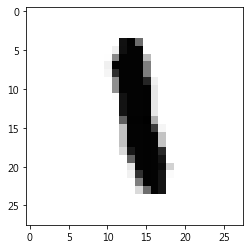

In [9]:
plt.imshow(x,cmap="Greys")

In [10]:
from keras.utils import np_utils

In [11]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10) 
#把0-9的輸出化成one-hot encoding

In [18]:
#打造CNN
#決定CNN架構，讀入相關套件
#CNN我們一樣要決定用幾層，然後不是每次都要做 MAX-pooling。
#最後就是拉平送入標準神經網路[Dense](決定幾層幾個神經元)

#做3次convolution，每次都接max-pooling
#filter大小3*3，max-pooling都用2*2為一區塊
#Dense設計:1個隱藏層，使用200個神經元

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD